(364, 272) (628, 98)


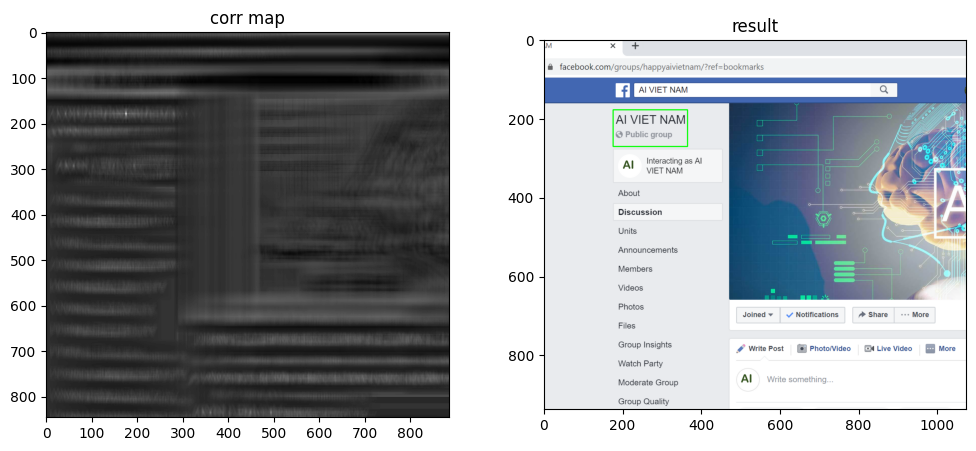

In [16]:
import cv2
import numpy as np
import matplotlib.pyplot as plt 

image = cv2.imread('./img/image.png')
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
img_gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
template = cv2.imread('./img/template.png',0)

w,h = template.shape

# apply template matching
corr_map = cv2.matchTemplate(img_gray, template, cv2.TM_CCOEFF_NORMED)
#  find location
min_val ,max_val , min_loc, max_loc = cv2.minMaxLoc(corr_map)

#draw 
# !! xác định max_loc rồi xác định min_loc chứ đừng tính ngược lại
top_left = max_loc
bottom_right = (top_left[0] + h, top_left[1] + w)
cv2.rectangle(image, top_left, bottom_right, (0,255,0), 2)


# convert [-1, 1] -> [0, 255]
corr_map = (corr_map + 1.0) * 127.5
corr_map = corr_map.astype('uint8')
fig = plt.figure(figsize=(12,5))

plt.subplot(1, 2, 1)
plt.imshow(corr_map, cmap="gray")
plt.title("corr map")

plt.subplot(1, 2, 2)
plt.imshow(image)
plt.title("result")

plt.show()